In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_stata("/Users/angelinapetrova/Desktop/SIPPdata.dta") 

# Econometrics Project

In this project I explore one of the key concepts in labour economics - labour supply elasticities. This concept is paramount in macroeconoic models that consider the labour market when analysing taxation and welfare. I estimate labour supply elasticities for the U.S. with the help of the Survery of Income and Program Participation (SIPP), thereby exploring the claim that men's labour supply is relatively inelastic whereas women’s labour supply is more elastic. The SIPP dataset is a household panel which contains detailed information. 

The first part of this project makes use of regression techniques to model the relationship between log(hours) worked and log(real wages)
over time, separately for women and men.  

The second section makes use of the panel data to estimate labour supply elasticities with the help of pooled OLS, random effects, and fixed effects. 

Finally, the last section explores the effect of unemployment on health insurance coverage. 

# Section 1: Time series

In [3]:
#MEN 
df_m = df.loc[df['esex'] == 1]

#WOMEN 
df_w = df.loc[df['esex'] == 2]


In [4]:
#MEN 
df_grouped = df_m[["rwage", "tmwkhrs", "refyear", "monthcode"]].groupby(["refyear", "monthcode"]).mean().reset_index()

#WOMEN 
df_groupedf= df_w[["rwage", "tmwkhrs", "refyear", "monthcode"]].groupby(["refyear", "monthcode"]).mean().reset_index()



In [5]:
# g spring = monthcode == 3 | monthcode == 4 | monthcode == 5
# g summer = monthcode == 6 | monthcode == 7 | monthcode == 8
# g autumn = monthcode == 9 | monthcode == 10 | monthcode == 11

spring = [3, 4, 5]
summer = [6, 7, 8]
autumn = [9, 10, 11]

In [6]:
df_grouped["spring"] = df_grouped["monthcode"].apply(lambda month: month in spring)
df_grouped["summer"] = df_grouped["monthcode"].apply(lambda month: month in summer)
df_grouped["autumn"] = df_grouped["monthcode"].apply(lambda month: month in autumn)

<AxesSubplot:xlabel='rwage', ylabel='tmwkhrs'>

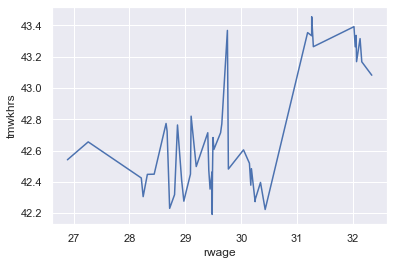

In [7]:
sns.lineplot(data=df_grouped, x = "rwage", y="tmwkhrs")

In [8]:
##Time series
import datetime 
datetime.datetime(year=2012, month=2, day=1)

datetime.datetime(2012, 2, 1, 0, 0)

In [9]:
df_grouped['ym'] = ( 
    df_grouped[["refyear", "monthcode"]]
    .apply(
        lambda row: datetime.datetime(year=int(row["refyear"]), month=int(row["monthcode"]), day = 1),
        axis=1)
)

<AxesSubplot:xlabel='ym', ylabel='tmwkhrs'>

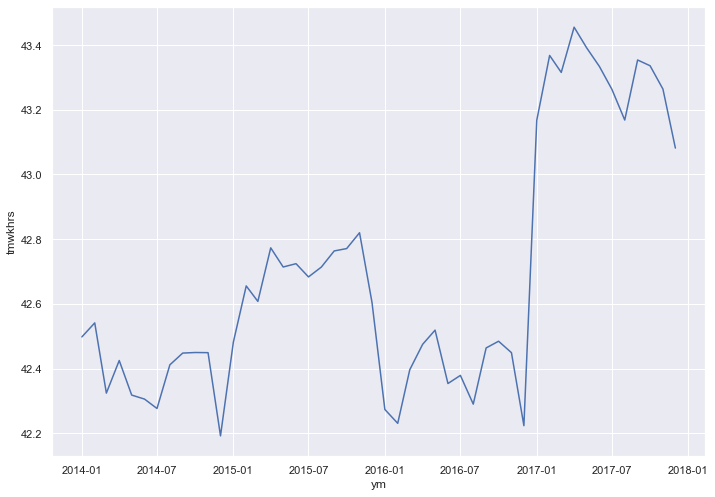

In [10]:
#Men's mean hours worked 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df_grouped, x = "ym", y="tmwkhrs")

<AxesSubplot:xlabel='ym', ylabel='rwage'>

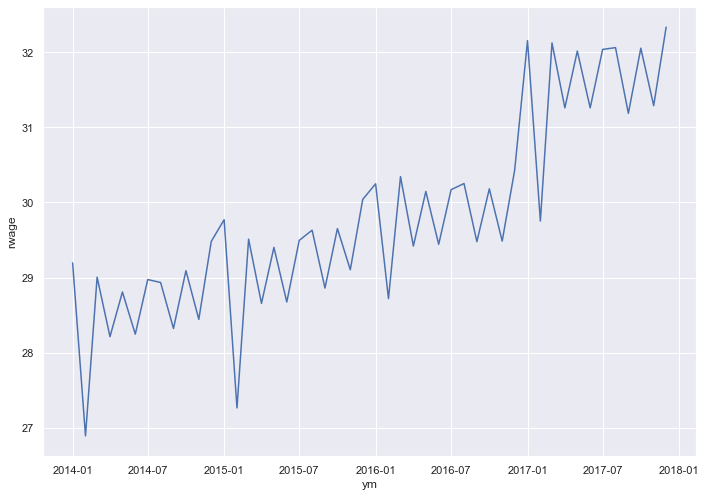

In [11]:
#Men's mean real wage
sns.lineplot(data=df_grouped, x = "ym", y="rwage")

In [12]:
np.datetime64("2021-10")

numpy.datetime64('2021-10')

In [13]:
df_groupedf['ym'] = ( 
    df_grouped[["refyear", "monthcode"]]
    .apply(
        lambda row: datetime.datetime(year=int(row["refyear"]), month=int(row["monthcode"]), day = 1),
        axis=1)
)
df_groupedf["spring"] = df_groupedf["monthcode"].apply(lambda month: month in spring)
df_groupedf["summer"] = df_groupedf["monthcode"].apply(lambda month: month in summer)
df_groupedf["autumn"] = df_groupedf["monthcode"].apply(lambda month: month in autumn)

<AxesSubplot:xlabel='ym', ylabel='tmwkhrs'>

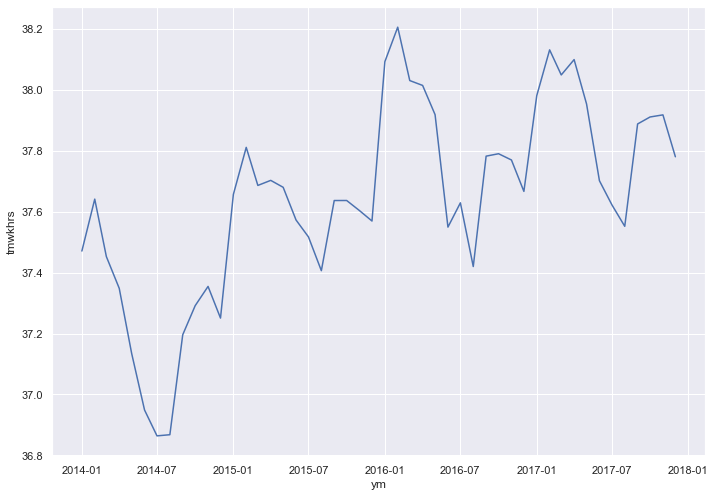

In [14]:
#Women's mean hours worked
sns.lineplot(data=df_groupedf, x = "ym", y="tmwkhrs")

<AxesSubplot:xlabel='ym', ylabel='rwage'>

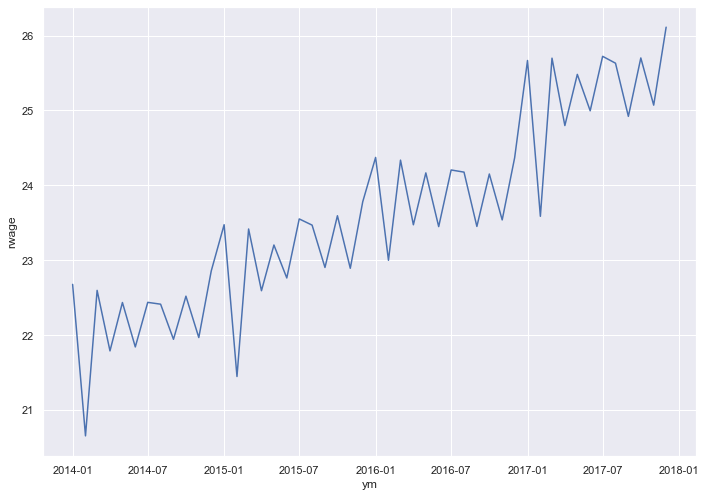

In [15]:
#Women's mean real wage
sns.lineplot(data=df_groupedf, x = "ym", y="rwage")

From these time series plots, we can observe a clear increasing trend in the average real wages over time for both men and women. However, for average hours worked, such a trend is not visually clear, especially not for men. This suggests that we should test for the presence of a trend in the four time series in our following analysis.
Moreover, we can observe that the level of average hours worked per week and average real wages is higher for men than for women during the years 2014-2017, which implies that, on average, men worked more hours and earned a higher wage during this time.

I have run a simple regression of the logarithm of hours worked on the logarithm of real wages, separately for men and women, with the results shown in the regression table below.

In [16]:
lrwage = np.log(df_grouped['rwage'])
df_grouped["lrwage"] = lrwage
lhours = np.log(df_grouped['tmwkhrs'])
df_grouped["lhours"] = lhours
results = smf.ols('np.log(tmwkhrs) ~ np.log(rwage)', data=df_grouped).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tmwkhrs)   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     35.91
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.97e-07
Time:                        19:46:04   Log-Likelihood:                 172.03
No. Observations:                  48   AIC:                            -340.1
Df Residuals:                      46   BIC:                            -336.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.2904      0.077     42.539      0.000       3.135       3.446
np.log(rwage)     0.1365      0.023      5.992      0.000       0.091       0.182
==============================================================================
Omnibus:                        0.537   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.666
Skew:                           0.130   Prob(JB):                        0.717
Kurtosis:                       2.485   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lrwage = np.log(df_groupedf['rwage'])
df_groupedf["lrwage"] = lrwage
lhours = np.log(df_groupedf['tmwkhrs'])
df_groupedf["lhours"] = lhours
resultsf = smf.ols('np.log(tmwkhrs) ~ np.log(rwage)', data=df_groupedf).fit()
resultsf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tmwkhrs)   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     19.50
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           6.04e-05
Time:                        19:46:04   Log-Likelihood:                 169.50
No. Observations:                  48   AIC:                            -335.0
Df Residuals:                      46   BIC:                            -331.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.3583      0.061     54.967      0.000       3.235       3.481
np.log(rwage)     0.0854      0.019      4.416      0.000       0.046       0.124
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.061
Skew:                          -0.040   Prob(JB):                        0.970
Kurtosis:                       3.155   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression coefficient on the logarithm of real wage for men is significant at a 1% level of significance. The coefficient is 0.137. Thus, we can conclude that when real wages for men increase by 100%, hours worked by men increase by 13.7\%. 

The regression coefficient on lrwage for women is significant at a 1% level of significance. The coefficient is 0.085. Thus, we can conclude that when real wages for women increase by 100%, hours worked by women increase by 8.5\%. 

These results suggest that men are more responsive to changes in real wages, as the coefficient on lrwage is larger for men than it is for women. Furthermore, the logarithm of real wage explains more of the variation in the logarithm of hours worked for men than women, since the value of adjusted R-squared is substantially higher for the regression for men than it is for women. The coefficient for both genders is less than one, which suggests that the labor elasticity for both genders is relatively inelastic, though more inelastic for women. This result is not in line with the current economic findings that men’s labor supply is relatively inelastic, whereas women’s labor supply is more elastic. However, it is likely that this regression suffers from several drawbacks, such as omitted variable bias, a limited time frame, or other issues that prevent us from drawing firm conclusions about the relationship between the labor supply and real wages of men and women, respectively. Thus, further analysis will follow to make better inference about the labor supply elasticity for men and women.


## Evidence for seasonality, trends and serial correlation in log real wages for men

<AxesSubplot:xlabel='ym', ylabel='lrwage'>

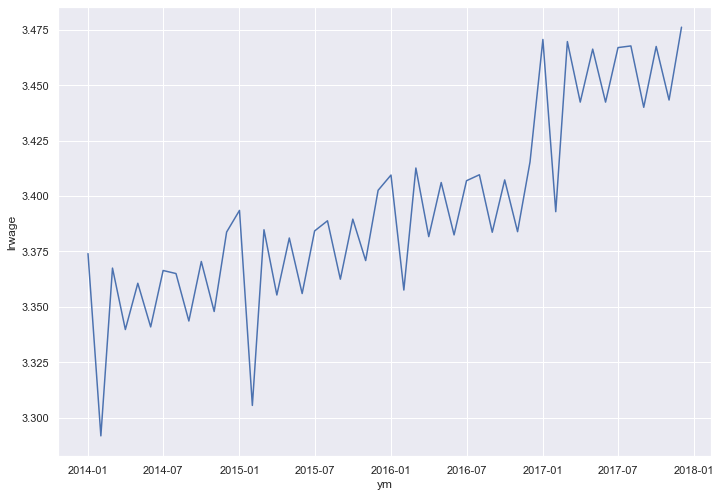

In [18]:
sns.lineplot(data=df_grouped, x = "ym", y="lrwage")

In [19]:
new = results.get_robustcov_results(cov_type='HAC',maxlags=1)
new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tmwkhrs)   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     31.58
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.07e-06
Time:                        19:46:05   Log-Likelihood:                 172.03
No. Observations:                  48   AIC:                            -340.1
Df Residuals:                      46   BIC:                            -336.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.2904      0.082     40.017      0.000       3.125       3.456
np.log(rwage)     0.1365      0.024      5.620      0.000       0.088       0.185
==============================================================================
Omnibus:                        0.537   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.666
Skew:                           0.130   Prob(JB):                        0.717
Kurtosis:                       2.485   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [20]:
newf = resultsf.get_robustcov_results(cov_type='HAC',maxlags=1)
newf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tmwkhrs)   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     12.70
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           0.000867
Time:                        19:46:05   Log-Likelihood:                 169.50
No. Observations:                  48   AIC:                            -335.0
Df Residuals:                      46   BIC:                            -331.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.3583      0.076     44.024      0.000       3.205       3.512
np.log(rwage)     0.0854      0.024      3.563      0.001       0.037       0.134
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.061
Skew:                          -0.040   Prob(JB):                        0.970
Kurtosis:                       3.155   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [21]:
##idk how to do the acf plot 

In [22]:
mod = smf.ols('lhours ~ lrwage + spring + summer + autumn', data=df_groupedf).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lhours   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.79e-07
Time:                        19:46:05   Log-Likelihood:                 180.72
No. Observations:                  48   AIC:                            -351.4
Df Residuals:                      43   BIC:                            -342.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3489      0.050     66.867      0.000       3.248       3.450
spring[T.True]    -0.0011      0.002     -0.462      0.646      -0.006       0.004
summer[T.True]    -0.0111      0.002     -4.589      0.000      -0.016      -0.006
autumn[T.True]    -0.0035      0.002     -1.466      0.150      -0.008       0.001
lrwage             0.0896      0.016      5.647      0.000       0.058       0.122
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.283
Skew:                          -0.081   Prob(JB):                        0.868
Kurtosis:                       2.660   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Section 2: Panel data

In [23]:
#Summary of data